In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
from sklearn import preprocessing


In [52]:
cancer = pd.read_csv('data.csv')

In [53]:
label_encoder = preprocessing.LabelEncoder() 
cancer['Diagnosis_Encoded']= label_encoder.fit_transform(cancer['Diagnosis'])


In [54]:
cancer.drop('Diagnosis',axis=1, inplace=True)

In [55]:
y = cancer[['Diagnosis_Encoded']]
x = cancer.drop(columns=['Diagnosis_Encoded','ID',], axis=1)

In [67]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=49, shuffle=True)

In [72]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()


GaussianNB()

In [69]:
accuracy_scores = cross_val_score(nb_model, x, y.values.ravel(), scoring='accuracy',cv=cv,).mean()
precision_scores = cross_val_score(nb_model, x, y.values.ravel(), scoring='precision',cv=cv,).mean()
recall_scores = cross_val_score(nb_model, x, y.values.ravel(), scoring='recall',cv=cv,).mean()
f1_scores = cross_val_score(nb_model, x, y.values.ravel(), scoring='f1',cv=cv,).mean()


In [70]:
print("DecisionTree Accuracy:",accuracy_scores)
print("DecisionTree Precision:",precision_scores)
print("DecisionTree Recall:",recall_scores)
print("DecisionTree F1-score:",f1_scores)


DecisionTree Accuracy: 0.9385964912280702
DecisionTree Precision: 0.9434358288770053
DecisionTree Recall: 0.8881236911710058
DecisionTree F1-score: 0.9144149839118783


In [61]:
predictions = cross_val_predict(nb_model,x,y.values.ravel(),cv=cv)
y_score = cross_val_predict(nb_model, x, y.values.ravel(), cv=cv, method='predict')

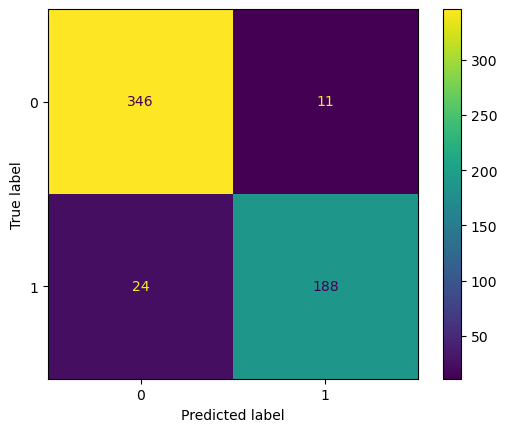

In [62]:
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [49]:
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y, y_score)
print('roc_auc_score  Random Forest: ', roc_auc_score(y, y_score))

roc_auc_score  Random Forest:  0.9279900639501084


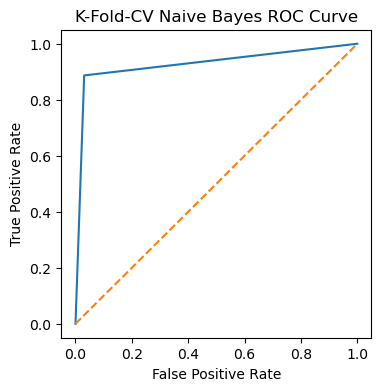

In [29]:
plt.subplots(1, figsize=(4,4))
plt.title('K-Fold-CV Naive Bayes ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()